In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os
os.getcwd()

'C:\\Users\\up332\\Desktop\\My Data'

In [4]:
#Declaration
L = 3;  g = 1.4; C = 0.5;
x = np.linspace(0,3,31)
n = 31; h = x[2]-x[1]
print(h)
A = np.zeros(n); r = np.zeros(n); T = np.zeros(n); v = np.zeros(n); rn =np.zeros(n); rhoc = np.zeros(n); 
rhoa=np.zeros(n); vn=np.zeros(n);va=np.zeros(n);Tn=np.zeros(n);Ta=np.zeros(n);vc=np.zeros(n);Tc=np.zeros(n) 
f = np.zeros(n)
a = 1 + (2.2*(x-1.5)**2)
r = 1 - (0.3146 * x)
T = 1-(0.2314 * x)
#print(T,'\n-----\n',rho)
v = (0.1 + 1.09*x) * (np.sqrt(T))
tmax=200;emax=1e-5

dt=1e-6
print('\n',v)
#k = np.log(1.02)
#print(k)

0.1

 [0.1        0.20656772 0.31055431 0.41191227 0.5105917  0.60654011
 0.69970225 0.79001982 0.87743124 0.96187135 1.04327104 1.12155693
 1.19665091 1.26846965 1.33692406 1.40191865 1.46335081 1.52110994
 1.57507649 1.62512075 1.67110158 1.71286469 1.75024077 1.78304316
 1.81106497 1.83407564 1.85181659 1.86399585 1.87028111 1.87029082
 1.86358258]


In [5]:
k=0
while k<400000:
    k+=1
    i=1
    while i<n-1:
       # print(i)
        if v[i]>0:
            dv = (v[i+1] - v[i-1])/(2*h); 
            da = (np.log(a[i+1]) - np.log(a[i-1]))/(2*h);
            dr = (r[i] - r[i-1])/h; 
            
            rn[i] =r[i] + dt* (- (r[i]*dv) - (r[i]*v[i]*da)  - (v[i]*dr) )
        else:
            dv = (v[i+1] - v[i-1])/(2*h); 
            da = (np.log(a[i+1]) - np.log(a[i-1]))/(2*h);
            dr = (r[i+1] - r[i])/h; 
            
            rn[i] =r[i] + dt* (- (r[i]*dv) - (r[i]*v[i]*da)  - (v[i]*dr) )
            
        if v[i]>0:
            dv = (v[i] - v[i-1])/(h); 
            #da = (np.log(a[i+1]) - np.log(a[i-1]))/(2*h);
            dr = (r[i+1] - r[i-1])/(2*h);
            dT =(T[i+1] - T[i-1])/(2*h) 

            vn[i] =v[i] + dt* ( -(v[i]*dv) - ( (1/g)*(dT + (T[i]/r[i])*dr) ) )
        else:
            dv = (v[i+1] - v[i])/(h); 
            #da = (np.log(a[i+1]) - np.log(a[i-1]))/(2*h);
            dr = (r[i+1] - r[i-1])/(2*h);
            dT =(T[i+1] - T[i-1])/(2*h) 

            vn[i] =v[i] + dt* ( -(v[i]*dv) - ( (1/g)*(dT + (T[i]/r[i])*dr) ) )
            
        if v[i]>0:
            dv = (v[i+1] - v[i-1])/(2*h); 
            da = (np.log(a[i+1]) - np.log(a[i-1]))/(2*h);
            #dr = (r[i+1] - r[i-1])/(2*h);
            dT =(T[i] - T[i-1])/(h) 
           
            Tn[i] =T[i] + dt* (- (v[i]*dT) - ( (g-1)*T[i]*(dv+ (v[i]*da) )  ) )
        else:
            dv = (v[i+1] - v[i-1])/(2*h); 
            da = (np.log(a[i+1]) - np.log(a[i-1]))/(2*h);
            #dr = (r[i+1] - r[i-1])/(2*h);
            dT =(T[i+1] - T[i])/(h) 
           
            Tn[i] =T[i] + dt* (- (v[i]*dT) - ( (g-1)*T[i]*(dv+ (v[i]*da) )  ) )
            
        i+=1
    #BCs
    #left
    rn[0]=1 
    Tn[0]=1
    vn[0]=2*vn[1]-vn[2]
    #Right
    rn[-1]=2*rn[-2]-rn[-3]
    vn[-1]=2*vn[-2]-vn[-3]
    Tn[-1]=2*Tn[-2]-Tn[-3]
    
   
    
    r=rn.copy()
    T=Tn.copy()
    v=vn.copy()
    m = r*a*v; p = r*T; M = v/np.sqrt(T);
print(r)

[1.         0.98328392 0.93906098 0.89660079 0.86924286 0.8589067
 0.86194211 0.87291499 0.88668517 0.89848674 0.90348902 0.89661583
 0.87304505 0.82952824 0.76610626 0.68706584 0.60000636 0.51327331
 0.43342443 0.36411347 0.30639615 0.25965393 0.22246235 0.19315926
 0.17014012 0.15198127 0.13747453 0.1256205  0.11560294 0.10678285
 0.09796275]


Text(0.5, 1.0, 'Density Variation 1D-Nozzle')

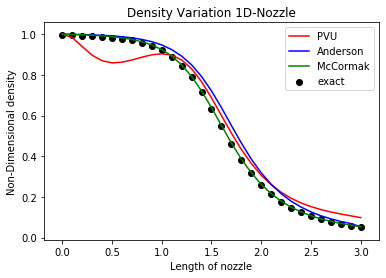

In [6]:
#plotinh
y=[1,0.999,0.998,0.997,0.994,0.992,0.987,0.982,0.974,0.963,0.947,0.924,0.892,0.849,0.792,0.721,0.639,0.551,0.465,0.386,0.318,0.262,0.216,0.179,0.150,0.126,0.107,0.092,0.079,0.069,0.053]
D =[0.995,0.994,0.992,0.99,0.987,0.983,0.978,0.97,0.958,0.942,0.92,0.888,0.844,0.787,0.716,0.634,0.547,0.461,0.382,0.315,0.258,0.213,0.176,0.147,0.124,0.105,0.09,0.078,0.068,0.059,0.052]
W = [1, 0.99779703, 0.99703034, 0.99427741, 0.99164719, 0.98734222, 0.98181488, 0.97378775, 0.96262348, 0.94666945, 0.92413506, 0.89250035, 0.84918067, 0.79207381, 0.72097542, 0.63869089, 0.55102888, 0.46498576, 0.38635487, 0.31838096, 0.2618377,  0.21592013, 0.17907414, 0.14965467, 0.12609971, 0.10721078, 0.09186352, 0.07947623, 0.06904757, 0.06095248, 0.05285738]
#K=max(abs((D-r)/D))
#print(K)
plt.plot(x,r,'r', label='PVU')
plt.plot(x,y,color='blue', label='Anderson')
plt.scatter(x,D,color='black', label='exact')
plt.plot(x,W,color='green', label='McCormak')
plt.legend()
plt.xlabel('Length of nozzle')
plt.ylabel('Non-Dimensional density')
plt.title('Density Variation 1D-Nozzle')
#plt.plot(x,r)
#plt.plot(x,A)
#plt.plot(x,M)
#plt.plot(x,m)

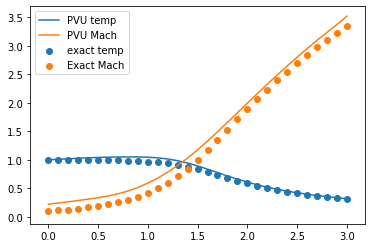

In [177]:
plt.plot(x,T, label='PVU temp')
F = [1,0.999,0.999,0.998,0.997,0.995,0.993,0.989,0.985,0.978,0.969,0.956,0.937,0.911,0.878,0.836,0.789,0.737,0.684,0.633,0.585,0.541,0.502,0.467,0.436,0.408,0.384,0.362,0.342,0.325,0.308]
plt.scatter(x,F,label = 'exact temp')
N = [0.099,0.112,0.125,0.143,0.163,0.187,0.216,0.252,0.296,0.350,0.416,0.496,0.594,0.710,0.846,0.99,1.167,1.345,1.528,1.710,1.89,2.065,2.233,2.394,2.549,2.696,2.839,2.972,3.105,3.225,3.353]
plt.plot(x,M, label='PVU Mach')
plt.scatter(x,N,label='Exact Mach')
plt.legend()

In [78]:
k=0
while k<200000:
    k+=1
    for i in range(n):
        if i>0 and i <n-1:
            if (v[i]>=0):
                rn[i]=r[i]-dt*((r[i]*(v[i+1]-v[i-1])/(2*h))+((r[i]*v[i])*(((np.log(A[i+1]))-(np.log(A[i-1])))/(2*h)))+(v[i]*((r[i]-r[i-1])/h)))
            else:
                rn[i]=r[i]-dt*((r[i]*(v[i+1]-v[i-1])/(2*h))+((r[i]*v[i])*(((np.log(A[i+1]))-(np.log(A[i-1])))/(2*h)))+(v[i]*((r[i+1]-r[i])/h)))
        
            if (v[i]>=0):
                vn[i]=v[i]-dt*((v[i]*((v[i]-v[i-1])/h))+((1/g)*((T[i+1]-T[i-1])/(2*h)))-((T[i]/r[i])*((r[i+1]-r[i-1])/(2*h))))
        
            else:
                vn[i]=v[i]-dt*((v[i]*((v[i+1]-v[i])/h))+((1/g)*((T[i+1]-T[i-1])/(2*h)))-((T[i]/r[i])*((r[i+1]-r[i-1])/(2*h))))

            if (v[i]>=0):
                Tn[i]=T[i]-dt*(((v[i])*(T[i]-T[i-1])/h)+(((g-1)*(T[i]))*((v[i+1]-v[i-1])/(2*h)))+(v[i]*(((np.log(A[i+1]))-(np.log(A[i])))/(2*h))))

            else:
                Tn[i]=T[i]-dt*(((v[i])*(T[i+1]-T[i])/h)+(((g-1)*(T[i]))*((v[i+1]-v[i-1])/(2*h)))+(v[i]*(((np.log(A[i+1]))-(np.log(A[i])))/(2*h))))
  
        
    #Boundary condition
    #left
    rn[0]=1 
    Tn[0]=1
    vn[0]=2*vn[1]-vn[2]
    #Right
    rn[-1]=2*rn[-2]-rn[-3]
    vn[-1]=2*vn[-2]-vn[-3]
    Tn[-1]=2*Tn[-2]-Tn[-3]
    
    
    
    r=rn.copy()
    T=Tn.copy()
    v=vn.copy()

print(rn)

[1.         0.32922412 0.43490911 0.72886903 0.90688569 0.87437064
 0.82325015 0.80854233 0.80693599 0.80569091 0.80325004 0.80034595
 0.79737052 0.79439979 0.79142942 0.78844992 0.78545486 0.78243864
 0.77939515 0.77631732 0.77319702 0.77002486 0.7667901  0.76348048
 0.76008204 0.75657896 0.75295341 0.74918533 0.74525234 0.74112959
 0.73678965 0.73220254 0.72733572 0.72215432 0.71662138 0.71069838
 0.70434584 0.69752429 0.69019533 0.68232309 0.67387581 0.66482766
 0.65516068 0.64486668 0.63394903 0.62242413 0.61032237 0.59768849
 0.58458114 0.57107161 0.55724181 0.54318153 0.52898525 0.51474869
 0.50056538 0.48652355 0.47270346 0.45917539 0.44599829 0.43321917
 0.42087307 0.40898355 0.39756358 0.38661674 0.37613848 0.36611751
 0.35653711 0.34737637 0.33861132 0.33021588 0.32216276 0.31442406
 0.30697192 0.29977891 0.29281842 0.28606484 0.27949384 0.27308238
 0.26680886 0.2606531  0.25459637 0.2486213  0.2427119  0.23685344
 0.23103242 0.22523647 0.21945424 0.21367538 0.20789042 0.2020